In [ ]:
!pip install tf_slim
!pip install tf_models_official
!pip install lvis

In [2]:
import os
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git
%cd /content/models/
#!git checkout 58d19c67e1d30d905dd5c6e5092348658fed80af
!apt-get update && apt-get install -y -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
!python object_detection/builders/model_builder_test.py

/content
fatal: destination path 'models' already exists and is not an empty directory.
/content/models
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 1s (196 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu

In [3]:
import zipfile
local_zip = '/content/fine_tuned_model.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/fine_tuned_model')
zip_ref.close()

In [4]:
# Descomprime y elimina el zip
import zipfile
import os

local_zip = '/content/fine_tuned_model.zip'

# Abrir y extraer el archivo zip
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/fine_tuned_model')

# Eliminar el archivo zip después de descomprimirlo
os.remove(local_zip)

In [5]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import tensorflow as tf
import numpy as np

PATH_TO_MODEL_DIR = "/content/fine_tuned_model"
PATH_TO_SAVE_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

detect_fn = tf.saved_model.load(PATH_TO_SAVE_MODEL)

In [6]:

label_map_pbtxt_fname = "/content/label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(label_map_pbtxt_fname)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Importamos la imagen
image_path = "/content/Se-acaban-los-vehiculos-a-gasolina-Motos-y-carros-atentos-a-los-futuros-cambios.jpg"

# La convertimos a array
image_np = np.array(Image.open(image_path))

# La convertimos a tensor y la agregamos una dimensión para que pueda leerla nuestro modelo
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

# Realizamos la detección del objeto
detections = detect_fn(input_tensor)



In [ ]:
detections

{'detection_multiclass_scores': <tf.Tensor: shape=(1, 100, 3), dtype=float32, numpy=
 array([[[6.35338482e-03, 5.57079017e-01, 1.39308367e-02],
         [3.31452442e-03, 2.61581764e-02, 4.74083543e-01],
         [4.32376424e-03, 3.76041055e-01, 1.23843849e-02],
         [6.72708359e-03, 1.22623174e-02, 3.52000564e-01],
         [2.92965351e-03, 2.97685713e-01, 2.17179842e-02],
         [1.80074188e-03, 2.70674378e-01, 7.65907206e-03],
         [7.48575153e-03, 2.34900713e-01, 5.91389462e-02],
         [3.31536890e-03, 4.54529742e-04, 2.33613327e-01],
         [4.94657503e-03, 2.51008989e-03, 2.28557467e-01],
         [6.62389398e-03, 4.17043571e-04, 1.98545173e-01],
         [1.49950781e-03, 8.54195270e-04, 1.80984765e-01],
         [4.53043543e-03, 1.70852780e-01, 3.70888375e-02],
         [7.51910871e-03, 3.70525289e-03, 1.66443110e-01],
         [4.70748730e-03, 3.08476214e-04, 1.41400233e-01],
         [4.15464398e-03, 1.12498458e-03, 1.14623785e-01],
         [3.58823314e-03, 2.35

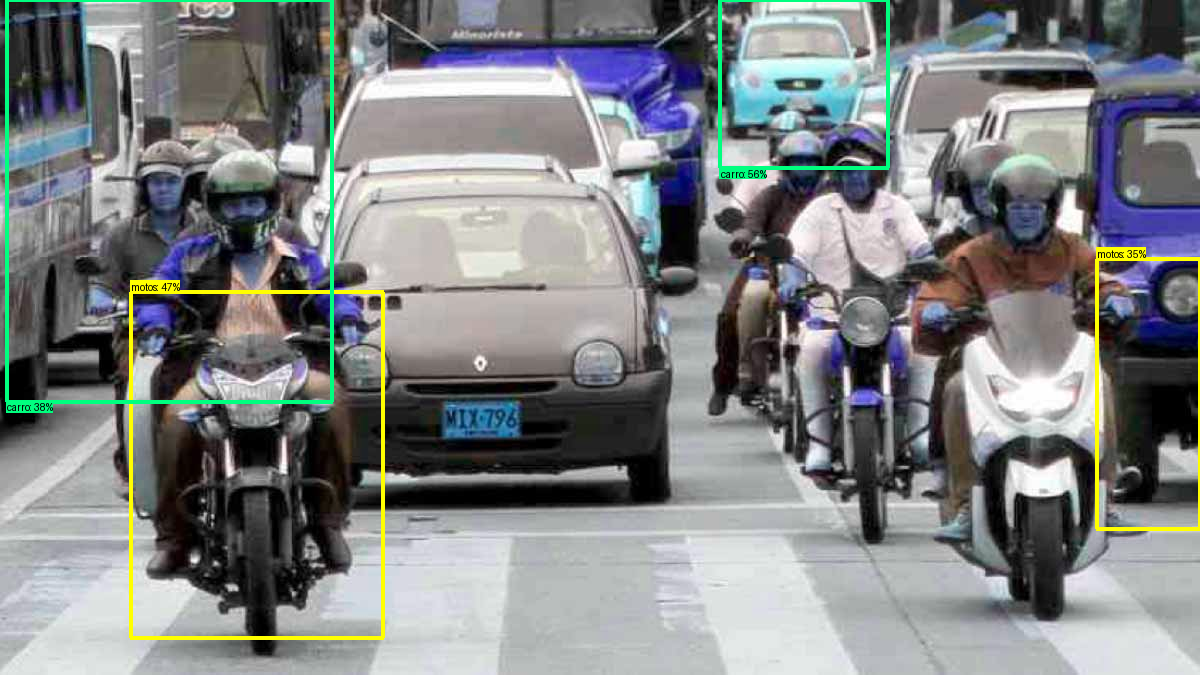

In [ ]:
# Analizamos cuántas detecciones se obtuvieron
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0,:num_detections].numpy() for key, value in detections.items()}

detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Tomamos una imagen y la copiamos para dibujar los bounding box
image_np_with_detections = image_np.copy()

# Utilizamos la libreria de obejct detection para visualizar le bounding box y la clasificación
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    max_boxes_to_draw=200,
    min_score_thresh=0.30,
    use_normalized_coordinates = True
)


# Visualizamos resultados
cv2_imshow(image_np_with_detections)

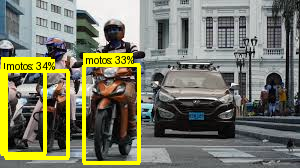

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Importamos la imagen
image_path = "/content/motoarro.jpg"

# La convertimos a array
image_np = np.array(Image.open(image_path))

# La convertimos a tensor y la agregamos una dimensión para que pueda leerla nuestro modelo
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

# Realizamos la detección del objeto
detections = detect_fn(input_tensor)

# Analizamos cuántas detecciones se obtuvieron
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0,:num_detections].numpy()
for key, value in detections.items()}

detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Tomamos una imagen y la copiamos para dibujar los bounding box
image_np_with_detections = image_np.copy()

# Utilizamos la libreria de obejct detection para visualizar le bounding box y la clasificación
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    max_boxes_to_draw=200,
    min_score_thresh=0.30,
    use_normalized_coordinates = True
)


# Visualizamos resultados
cv2_imshow(image_np_with_detections)

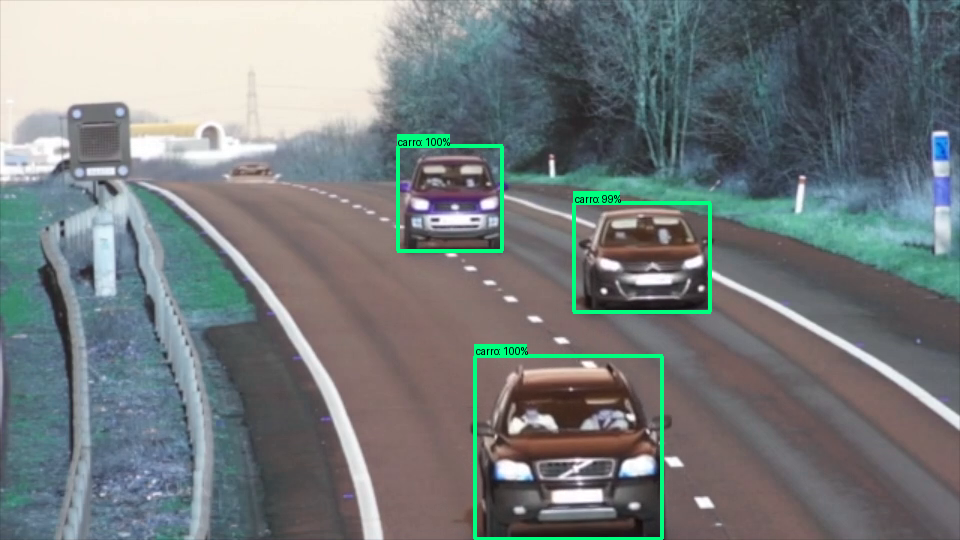

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Importamos la imagen
image_path = "/content/3 (18).png"

# La convertimos a array
image_np = np.array(Image.open(image_path))

# La convertimos a tensor y la agregamos una dimensión para que pueda leerla nuestro modelo
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

# Realizamos la detección del objeto
detections = detect_fn(input_tensor)

# Analizamos cuántas detecciones se obtuvieron
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0,:num_detections].numpy()
for key, value in detections.items()}

detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Tomamos una imagen y la copiamos para dibujar los bounding box
image_np_with_detections = image_np.copy()

# Utilizamos la libreria de obejct detection para visualizar le bounding box y la clasificación
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    max_boxes_to_draw=200,
    min_score_thresh=0.30,
    use_normalized_coordinates = True
)


# Visualizamos resultados
cv2_imshow(image_np_with_detections)

## Seguimiento de centroides con OpenCV

In [10]:
import numpy as np
import imutils
import time
import dlib
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from imutils.video import VideoStream
from imutils.video import FPS
from centroidtracker import CentroidTracker
from trackableobject import TrackableObject



In [11]:
PATH_VIDEO = "/content/test_video.mp4"

PATH_OUTPUT = "/content/video_out.mp4"

SKIP_FPS = 30
TRESHOLD = 0.5

vs = cv2.VideoCapture(PATH_VIDEO)
writer = None
W = int(vs.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(vs.get(cv2.CAP_PROP_FRAME_HEIGHT))

ct = CentroidTracker(maxDisappeared= 40, maxDistance = 50)

trackers = []
trackableObjects = {}

totalFrame = 0
totalDown = 0
totalUp = 0

DIRECTION_PEOPLE = True

POINT = [0, int((H/2)-H*0.1), W, int(H*0.1)]

fps = FPS().start()

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter(PATH_OUTPUT, fourcc, 20.0, (W, H), True)

while True:
  ret, frame = vs.read()

  if frame is None:
    break

  status = "Waiting"
  rects = []

  if totalFrame % SKIP_FPS == 0:
    status = "Detecting"
    trackers = []
    image_np = np.array(frame)

    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detect_fn(input_tensor)

    detection_scores = np.array(detections["detection_scores"][0])

    detection_clean = [x for x in detection_scores if x >= TRESHOLD]

    for x in range(len(detection_clean)):
      idx = int(detections['detection_classes'][0][x])

      ymin, xmin, ymax, xmax = np.array(detections['detection_boxes'][0][x])
      box = [xmin, ymin, xmax, ymax] * np.array([W, H, W, H])

      (startX, startY, endX, endY) = box.astype("int")

      tracker = dlib.correlation_tracker()
      rect = dlib.rectangle(startX, startY, endX, endY)
      tracker.start_track(frame, rect)

      trackers.append(tracker)
  else:
    for tracker in trackers:

      status = "Tracking"

      tracker.update(frame)
      pos = tracker.get_position()

      startX = int(pos.left())
      startY = int(pos.top())
      endX = int(pos.right())
      endY = int(pos.bottom())

      rects.append((startX, startY, endX, endY))

  cv2.rectangle(frame, (POINT[0], POINT[1]), (POINT[0]+ POINT[2], POINT[1] + POINT[3]), (255, 0, 255), 2)

  objects = ct.update(rects)

  for (objectID, centroid) in objects.items():
    to = trackableObjects.get(objectID, None)
    if to is None:
      to = TrackableObject(objectID, centroid)

    else:
      y = [c[1] for c in to.centroids]
      direction = centroid[1] - np.mean(y)
      to.centroids.append(centroid)

      if not to.counted:
        if centroid[0] > POINT[0] and centroid[0] < (POINT[0]+ POINT[2]) and centroid[1] > POINT[1] and centroid[1] < (POINT[1]+POINT[3]):
          if DIRECTION_PEOPLE:
            if direction > 0:
              totalUp += 1
              to.counted = True
            else:
              totalDown +=1
              to.counted = True
          else:
            if direction <0:
              totalUp += 1
              to.counted = True
            else:
              totalDown +=1
              to.counted = True

    trackableObjects[objectID] = to

    text = "ID {}".format(objectID)
    cv2.putText(frame, text, (centroid[0]-10, centroid[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    cv2.circle(frame, (centroid[0], centroid[1]), 4, (0,255,0), -1)

  info = [
          ("Subiendo", totalUp),
          ("Bajando", totalDown),
          ("Estado", status),
  ]

  for (i, (k,v)) in enumerate(info):
    text = "{}: {}".format(k,v)
    cv2.putText(frame, text, (10, H - ((i*20) + 20)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)

  writer.write(frame)
  totalFrame += 1
  fps.update()


fps.stop()

print("Tiempo completo {}".format(fps.elapsed()))
print("Tiempo aproximado por frame {}".format(fps.fps()))

writer.release()
vs.release()


Tiempo completo 149.495808
Tiempo aproximado por frame 11.83310772165598
